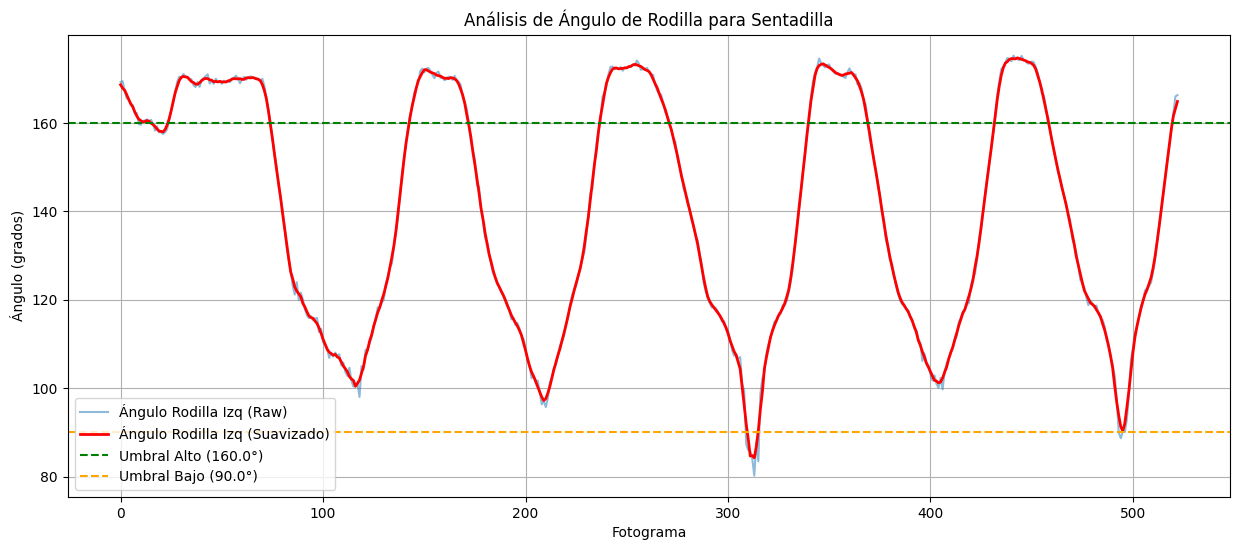

Estadísticas del ángulo suavizado:
count    523.000000
mean     139.818690
std       26.564793
min       84.251360
25%      116.032021
50%      140.419314
75%      168.491885
max      174.727825
Name: rodilla_izq_suave, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# --- INICIO DE LA SOLUCIÓN CORREGIDA ---
# 1. Encontrar la ruta raíz del proyecto dinámicamente
# Sube un nivel desde la carpeta 'notebooks' para llegar a 'gym-performance-analysis'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# 2. Añadir la RUTA RAÍZ DEL PROYECTO al path de Python
if project_root not in sys.path:
    sys.path.insert(0, project_root)
# --- FIN DE LA SOLUCIÓN CORREGIDA ---

# 3. Ahora la importación 'from src...' funcionará correctamente
from src import config 

# 4. Cargar los datos generados por la app
# (Asegúrate de que el análisis se ha ejecutado en 'Modo Depuración')
metrics_path = os.path.join(project_root, 'data', 'processed', '2_Sq_Frontal_Sin_Camiseta', '2_Sq_Frontal_Sin_Camiseta_2_metrics.csv')
try:
    df = pd.read_csv(metrics_path)
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo en la ruta:\n{metrics_path}")
    df = pd.DataFrame() 

if not df.empty:
    # 5. SUAVIZAR LA SEÑAL
    df['rodilla_izq_suave'] = df['rodilla_izq'].rolling(window=5, center=True, min_periods=1).mean()

    # 6. Visualizar los datos
    plt.figure(figsize=(15, 6))
    plt.plot(df['frame_idx'], df['rodilla_izq'], label='Ángulo Rodilla Izq (Raw)', alpha=0.5)
    plt.plot(df['frame_idx'], df['rodilla_izq_suave'], label='Ángulo Rodilla Izq (Suavizado)', color='red', linewidth=2)

    plt.axhline(y=config.SQUAT_HIGH_THRESH, color='g', linestyle='--', label=f'Umbral Alto ({config.SQUAT_HIGH_THRESH}°)')
    plt.axhline(y=config.SQUAT_LOW_THRESH, color='orange', linestyle='--', label=f'Umbral Bajo ({config.SQUAT_LOW_THRESH}°)')

    plt.title('Análisis de Ángulo de Rodilla para Sentadilla')
    plt.xlabel('Fotograma')
    plt.ylabel('Ángulo (grados)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 7. Imprimir estadísticas para ver los valores reales
    print("Estadísticas del ángulo suavizado:")
    print(df['rodilla_izq_suave'].describe())